In [1]:
import sys; sys.path.append(_dh[0].split("knowknow")[0])
from knowknow import *

database_name = 'sociology-jstor'

In [2]:
cits = get_cnt("%s.doc" % database_name, ['c.fy'])

cysum = load_variable("%s.cysum" % database_name)
cysum = list(cysum.values())

Loaded keys: dict_keys(['c.fy'])
Available keys: ['fy', 'c', 'fj', 'fj.fy', 'c.fj', 'c.fy', 'a.c', 'a.fj.fy', 'a', 'c.c', 'c.t', 't', 'fy.t', 'fj.t']


In [3]:
def dead_now_cited_when(RANGE_START, RANGE_END):

    count_in_range = defaultdict(int)
    for (c,y),count in cits['c.fy'].items():
        if RANGE_END >= y >= RANGE_START:
            count_in_range[c] += count

    dying_count = defaultdict(lambda:defaultdict(int))

    step = 5
    counts = np.array(range(0,100,step))
    linestyles = ['-','--','-.']

    for x in cysum:

        for dk in ['death1','death2','death3']:
            dying_count[dk][(
                (count_in_range[x['name']]//step)*step,
                x[dk] is not None
            )] += 1
            dying_count[dk][(
                (count_in_range[x['name']]//step)*step,
                "total"
            )] += 1

    plt.subplots_adjust(top=1.5)

    shift = 7.5

    plt.subplot(3,1,1)
    for i,dk in enumerate(['death1']):
        probs = np.array([ 
            dying_count[dk][(c,True)]/dying_count[dk][(c,"total")] 
            if dying_count[dk][(c,"total")] else float("nan") 
            for c in counts 
        ])
        plt.plot(counts+step/2,probs*100,label=dk,linestyle=linestyles[i], color='black')
    plt.legend();
    plt.xticks(counts)
    plt.xlim(min(counts)-shift,max(counts)+shift)
    plt.ylabel("% dead")

    plt.subplot(3,1,2)
    for i,dk in enumerate(['death2','death3']):
        probs = np.array([ 
            dying_count[dk][(c,True)] / dying_count[dk][(c,"total")] 
            if dying_count[dk][(c,"total")] else float("nan") 
            for c in counts 
        ])
        plt.plot(counts+step/2,probs*100,label=dk,linestyle=linestyles[i], color='black')
    plt.legend();
    plt.xticks(counts)
    plt.xlim(min(counts)-shift,max(counts)+shift)
    #plt.xlabel("Number of citations")
    plt.ylabel("% dead")

    totals = [ dying_count[dk][(c,"total")] for c in counts ]
    plt.subplot(3,1,3)
    plt.bar(counts,np.log10(totals),5,fill=False)

    plt.xlabel("Number of citations in %s-%s"%(RANGE_START,RANGE_END))
    plt.ylabel("# works")
    ytarget = np.array([1,10,50,250,1000,5000,25000,100000,500000])
    plt.yticks(
        np.log10(ytarget),
        ytarget
    )

    plt.xticks(counts)
    plt.grid(False,'both','x')

    #plt.title("Proportion of citations published before 1980 dead$_i$ by 2010,\nby maximum citations received in one year")
    save_figure("%s.pdead2010.%s-%s" %(
        database_name,
        RANGE_START,
        RANGE_END
    ))
    plt.show()

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log10


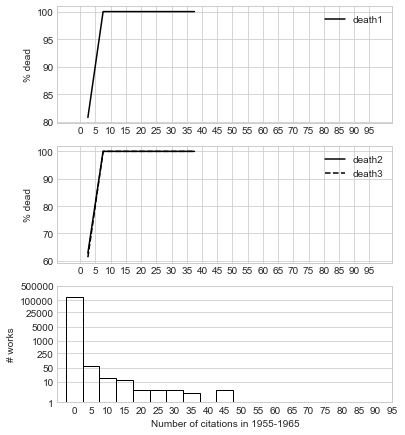

In [4]:
dead_now_cited_when(1955,1965)

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log10


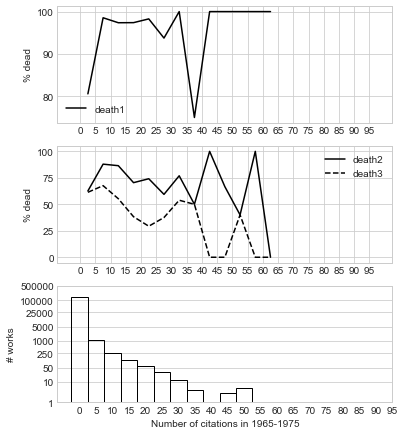

In [5]:
dead_now_cited_when(1965,1975)

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log10


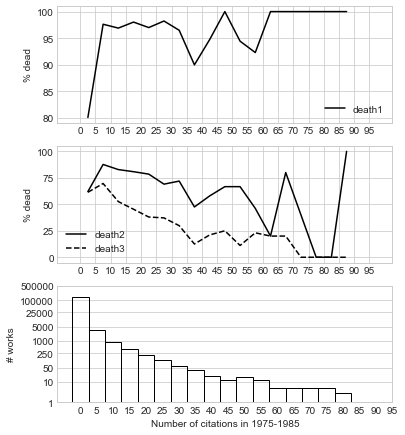

In [6]:
dead_now_cited_when(1975,1985)

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log10


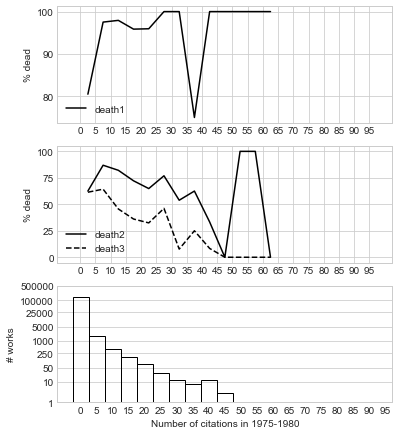

In [7]:
dead_now_cited_when(1975,1980)